<a href="https://colab.research.google.com/github/SukyC/Project/blob/main/Project_1/Project_1_%EC%B5%9C%EC%88%98%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다음 분기에 어떤 게임을 설계해야 할까? 
 

어떤 게임을 설계해야 하는지 알아보는 것이 중요한 이유
: GTA5 의 경우에는 한화 2792억에 달하는 엄청난 개발비가 소요되었음. [출처](https://game.donga.com/90300/) 

이와 같이 게임 개발에 투입되는 비용이 매우 많기 때문에 개발 전 소비자들의 게임에 대한 수요와 선호도를 파악하는 것이 중요 

🕹️ Data Description


Name : 게임의 이름입니다.  
Platform : 게임이 지원되는 플랫폼의 이름입니다.  
Year : 게임이 출시된 연도입니다.  
Genre : 게임의 장르입니다.  
Publisher : 게임을 제작한 회사입니다.  
NA_Sales : 북미지역에서의 출고량입니다.  
EU_Sales : 유럽지역에서의 출고량입니다.  
JP_Sales : 일본지역에서의 출고량입니다.  
Other_Sales : 기타지역에서의 출고량입니다.
+ 출고량의 단위는 백만입니다. 




# 1. 데이터 전처리 

In [1]:
# 사용한 라이브러리 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/vgames2.csv')

df=df.drop(['Unnamed: 0'],axis=1) # 첫번째 빈 열 제거
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [4]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03




*   Year 컬럼에 271개의 결측치가 있음
*   Genre 컬럼에 50개의 결측치가 있음 
*   Publisher 컬럼에 58개의 결측치가 있음
* Year 값의 표기 확인할 것  
*   Sales 값들이 object 로 표현되어 있음 -> 연산을 위해 숫자형으로 변경 필요함 




##1) 데이터 형태 및 결측치 처리 
> Sales 컬럼의 값을 숫자형으로 변경하기



In [5]:
# K,k,M,m값을 제거하고 숫자형으로 변경하기 
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) / 1000
        return 1000.0
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) / 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) 
        return 1000000.0
    if 'm' in x:
        if len(x) > 1:
            return float(x.replace('m', ''))
        return 1000000.0
    return float(x)

In [6]:
sales=['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']

for c in sales: 
  df[c]=df[c].apply(value_to_float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


> Year 값 변경하기 

In [8]:
def year_converter(a):
  if a < 50:
    return int(a + 2000)
  elif a >51 and a <99 :
    return int(a + 1900)
  else :
    return a

In [9]:
year1=df['Year']
year1=year1.apply(year_converter)
df['Year']= year1
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 결측치 처리하기 
* 결측치가 있는 데이터를 무조건 제거할 것이 아니라 전세계 출고량을 확인 후 분석에 큰 영향이 없는 게임의 경우에는 제거하고, 분석에 영향을 미칠 수 있는 게임은 결측치를 채워준다 


In [10]:
#게임별 전세계 출고량을 구함 
df["World_Sales"]=df.iloc[:,[5,6,7,8]].sum(axis=1)

In [11]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537164
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555151
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


* 평균값이 0.537 이므로 Word_Sales가 평균보다 작은 데이터는 삭제하고, 나머지 데이터는 Year를 검색하여 결측치를 보간하기로 했다. 

In [12]:
df_year_null=df[df.Year.isnull()] 
df_below=df_year_null[df_year_null["World_Sales"]< 0.537]
df_below

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0.00,0.00,0.02,0.00,0.02
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0.00,0.06,0.00,0.01,0.07
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0.00,0.00,0.00,0.03
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0.00,0.00,0.17,0.03,0.20
548,Transworld Surf,XB,NaN,Sports,Atari,0.10,0.03,0.00,0.00,0.13
...,...,...,...,...,...,...,...,...,...,...
16130,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,NaN,0.00,0.00,0.12,0.00,0.12
16195,Singularity,X360,NaN,Shooter,Unknown,0.24,0.05,0.00,0.02,0.31
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0.00,0.00,0.00,0.06


* Year 컬럼에 결측치를 가진 271개의 게임중에 총 221개의 전세계 출고량이 평균값인 0.537에 미치지 못하는 것으로 확인되었다. 따라서 이 게임들은 삭제하기로 하였다.  

In [13]:
df_below_index=df_below.index.to_list()
df=df.drop(df_below_index)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [14]:
df_search=df[df.Year.isnull()]
index1=df_search.index
index1

Int64Index([   31,  1041,  2056,  2130,  2142,  2492,  3031,  3291,  3347,
             3562,  3942,  4165,  4181,  4196,  4255,  4488,  5144,  5309,
             5674,  5720,  6118,  6949,  7682,  8529,  9240,  9698,  9958,
            10084, 10301, 10563, 10776, 10965, 11309, 11316, 11665, 12390,
            12787, 12858, 12986, 13327, 13357, 13752, 14049, 14580, 14585,
            14765, 14968, 15317, 16275, 16278],
           dtype='int64')

In [15]:
name_list=df_search.Name.to_list()
name_list

['Rock Band',
 'Metal Gear Solid 2: Substance',
 'The Golden Compass',
 'Call of Duty 3',
 'Madden NFL 06',
 'Madden NFL 2002',
 'Donkey Kong Land III',
 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
 'LEGO Batman: The Videogame',
 'wwe Smackdown vs. Raw 2006',
 'Legacy of Kain: Soul Reaver',
 'Namco Museum',
 'Rock Band',
 'Test Drive Unlimited 2',
 'Shaun White Snowboarding',
 'The Lord of the Rings: War in the North',
 'Yakuza 4',
 'LEGO Harry Potter: Years 5-7',
 'Hitman 2: Silent Assassin',
 'Adventure',
 'Wheel of Fortune',
 'Madden NFL 2004',
 'MLB SlugFest 20-03',
 'LEGO Indiana Jones: The Original Adventures',
 'LEGO Harry Potter: Years 5-7',
 'Def Jam: Fight for NY',
 'LEGO Batman: The Videogame',
 'Advance Wars: Days of Ruin',
 'Madden NFL 07',
 'LEGO Harry Potter: Years 5-7',
 'Rock Band',
 'FIFA Soccer 2004',
 'Triple Play 99',
 'Air-Sea Battle',
 'The Lord of the Rings: War in the North',
 'WarioWare: Twisted!',
 'NASCAR: Dirt to Daytona',
 'Rock Band'

In [16]:
year=[2007, 2002, 2006, 2006, 2005, 2001, 1997, 2005, 2008, 2005, 1999, 1995, 
      2008, 2011, 2008, 2011, 2010, 2011, 2002, 1980, 2003, 2003, 2002, 2008, 2011,
      2004, 2008, 2008, 2006, 2011, 2007, 2003, 1998, 1977, 2011, 2004, 2002, 2007,
      2010, 2001, 2011, 2002, 2006, 2008, 2002, 1977, 2008, 2011, 1978, 2010]

#각 게임의 이름을 검색하여 최초출시일을 입력함
#하나의 게임이 여러 플랫폼에서 출시 되었을 경우 해당 플랫폼에서의 첫 출시일을 입력함 
#하나의 게임이 여러 지역에서 출시되었으나 각각의 출시일이 다를때는 최초출시일을 입력함

In [17]:
dict1= dict(zip(index1, year))

for key,value in dict1.items():
  df.at[key,'Year'] = value

df.Year=df.Year.astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16377 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16377 non-null  object 
 1   Platform     16377 non-null  object 
 2   Year         16377 non-null  int64  
 3   Genre        16327 non-null  object 
 4   Publisher    16339 non-null  object 
 5   NA_Sales     16377 non-null  float64
 6   EU_Sales     16377 non-null  float64
 7   JP_Sales     16377 non-null  float64
 8   Other_Sales  16377 non-null  float64
 9   World_Sales  16377 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 2.0+ MB


Year 컬럼의 결측치가 모두 채워졌다. 

이와 동일한 방식으로 Genre, Publisher 컬럼의 결측치도 삭제 및 채워준다. 

In [19]:
df_pub=df[df.Publisher.isnull()]
index2= df_pub[df_pub["World_Sales"]<0.537].index
df=df.drop(index2)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16345 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16345 non-null  object 
 1   Platform     16345 non-null  object 
 2   Year         16345 non-null  int64  
 3   Genre        16295 non-null  object 
 4   Publisher    16339 non-null  object 
 5   NA_Sales     16345 non-null  float64
 6   EU_Sales     16345 non-null  float64
 7   JP_Sales     16345 non-null  float64
 8   Other_Sales  16345 non-null  float64
 9   World_Sales  16345 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [21]:
index3=df[df.Publisher.isnull()].index

In [22]:
df[df.Publisher.isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales
1961,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,0.46,0.17,0.0,0.01,0.64
3562,wwe Smackdown vs. Raw 2006,PS2,2005,Fighting,NaN,1.57,1.02,0.0,0.41,3.00
8236,Bentley's Hackpack,GBA,2005,Misc,NaN,0.67,0.25,0.0,0.02,0.94
11309,Triple Play 99,PS,1998,Sports,NaN,0.81,0.55,0.0,0.10,1.46
12900,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.46,0.17,0.0,0.01,0.64
15368,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007,Misc,NaN,0.87,0.32,0.0,0.02,1.21


In [23]:
pub_list=['Majesco','THQ','Sanzaru Games Inc.', 'EA Sports', 'Majesco','Majesco']

In [24]:
dict2= dict(zip(index3, pub_list))
for key,value in dict2.items():
  df.at[key,'Publisher'] = value

In [25]:
df_Genre=df[df.Genre.isnull()]
index4=df_Genre[df_Genre['World_Sales']<0.537].index
df=df.drop(index4)

In [26]:
df.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [27]:
index5=df[df.Genre.isnull()].index

In [28]:
genre1= ['Platform','Sports','Action','Role-Playing','Sports','Adventure', 
         'Fighting','Misc','Role-Playing','Role-Playing','Adventure','Racing',
         'Adventure','Adventure','Shooter','Misc', 'Role-Playing','Racing'] 

#게임의 장르는 '게임명 + genre'로 검색하였고 
# 복합적인 장르의 경우에는 뒤에 나열된 단어를 입력하였다. 
# 예) Action-advanture: Advanture 를 입력, Tactic Role-Playing: Role-Playing 입력
# Genre.Unique()에서 나열된 장르 이외의 값은 모두 Misc(기타) 장르로 분류하였다. 

In [29]:
dict3= dict(zip(index5, genre1))
for key,value in dict3.items():
  df.at[key,'Genre'] = value

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16313 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16313 non-null  object 
 1   Platform     16313 non-null  object 
 2   Year         16313 non-null  float64
 3   Genre        16313 non-null  object 
 4   Publisher    16313 non-null  object 
 5   NA_Sales     16313 non-null  float64
 6   EU_Sales     16313 non-null  float64
 7   JP_Sales     16313 non-null  float64
 8   Other_Sales  16313 non-null  float64
 9   World_Sales  16313 non-null  float64
dtypes: float64(6), object(4)
memory usage: 2.0+ MB


최종적으로 총 16598개의 데이터에서 결측치를 삭제 및 보간한 뒤 남은 데이터의 개수는 16313개로 98.3% 의 데이터가 살아남았고 1.7% 데이터가 삭제되었다. 

In [189]:
df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00,0.04
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01,0.08


#2. 데이터 분석


## 1. 지역에 따라 선호하는 게임의 장르가 다를까? 

In [195]:
df1_gen=df.groupby(['Genre']).sum()

df1_gen.drop(['Year'], axis=1)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales
Genre,,,,,
Action,869.25,519.78,157.24,186.32,1732.59
Adventure,106.71,65.92,53.58,17.30,243.51
Fighting,222.74,101.12,87.15,36.62,447.63
Misc,405.53,214.48,107.88,74.55,802.44
Platform,446.58,200.95,130.65,51.54,829.72
Puzzle,121.74,50.53,56.74,12.46,241.47
Racing,357.87,237.50,56.62,77.06,729.05
Role-Playing,327.72,188.55,351.56,59.82,927.65
Shooter,580.10,312.30,38.18,102.40,1032.98


In [196]:
a=df1_gen.NA_Sales.nlargest(5)
b=df1_gen.EU_Sales.nlargest(5)
c=df1_gen.JP_Sales.nlargest(5)
d=df1_gen.Other_Sales.nlargest(5)

In [197]:
print(a,b,c,d)

Genre
Action      869.25
Sports      677.98
Shooter     580.10
Platform    446.58
Misc        405.53
Name: NA_Sales, dtype: float64 Genre
Action     519.78
Sports     375.31
Shooter    312.30
Racing     237.50
Misc       214.48
Name: EU_Sales, dtype: float64 Genre
Role-Playing    351.56
Action          157.24
Sports          135.08
Platform        130.65
Misc            107.88
Name: JP_Sales, dtype: float64 Genre
Action     186.32
Sports     134.38
Shooter    102.40
Racing      77.06
Misc        74.55
Name: Other_Sales, dtype: float64


In [198]:
df_a=pd.DataFrame(a).reset_index()
df_b=pd.DataFrame(b).reset_index()
df_c=pd.DataFrame(c).reset_index()
df_d=pd.DataFrame(d).reset_index()

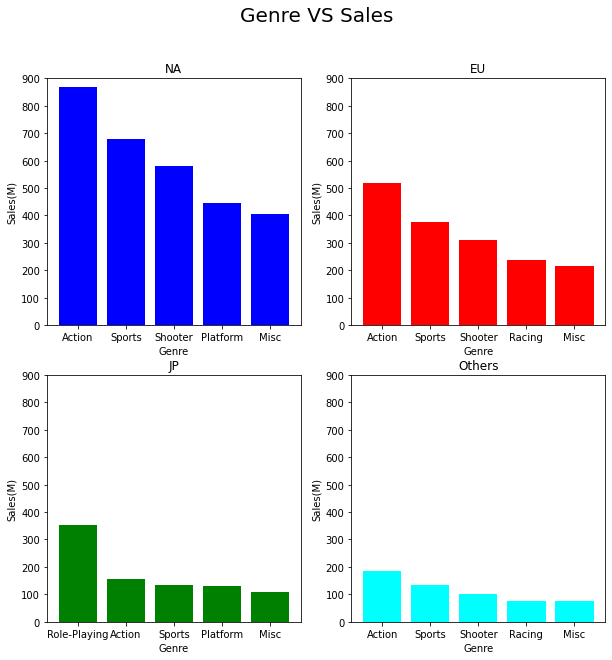

In [199]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(10,10));

plt.subplot(2,2,1);
plt.bar(x=df_a.Genre,height=df_a.NA_Sales,color='blue');
plt.xlabel('Genre');
plt.ylabel('Sales(M)');
plt.ylim([0, 900]);
plt.title('NA');

plt.subplot(2,2,2);
plt.bar(x=df_b.Genre,height=df_b.EU_Sales, color='red');
plt.xlabel('Genre');
plt.ylabel('Sales(M)');
plt.ylim([0, 900]);
plt.title('EU');

plt.subplot(2,2,3);
plt.bar(x=df_c.Genre,height=df_c.JP_Sales,color='green');
plt.xlabel('Genre');
plt.ylabel('Sales(M)');
plt.ylim([0, 900]);  
plt.title('JP');

plt.subplot(2,2,4);
plt.bar(x=df_d.Genre,height=df_d.Other_Sales,color='cyan');
plt.xlabel('Genre');
plt.ylabel('Sales(M)');
plt.ylim([0, 900]);   
plt.title('Others');

plt.suptitle("Genre VS Sales",fontsize=20);
plt.savefig('GenreVsSales.png')
plt.show()


1. 지역별로 판매량의 규모 차이는 있으나 액션과 스포츠가 강세를 보이는 것을 확인할 수 있음
2. 특이점은 일본의 경우 롤플레잉이 1등 

In [200]:
df_year= pd.pivot_table(df,index='Year',columns='Genre',aggfunc=np.sum,fill_value=0)
df_year

EU_Sales                            ... World_Sales                            
Genre   Action Adventure Fighting   Misc  ...     Shooter Simulation  Sports Strategy
Year                                      ...                                        
1977      0.07      0.00     0.00   0.00  ...        0.98       0.00    0.00     0.00
1978      0.00      0.00     0.00   0.00  ...        2.53       0.00    0.00     0.00
1980      0.02      0.08     0.04   0.15  ...        7.07       0.00    0.00     0.00
1981      0.81      0.00     0.00   0.00  ...       10.02       0.44    0.78     0.00
1982      0.38      0.00     0.00   0.05  ...        3.81       0.00    1.06     0.00
1983      0.17      0.02     0.00   0.00  ...        0.49       0.00    3.20     0.00
1984      0.19      0.00     0.00   0.00  ...       31.10       0.00    6.17     0.00
1985      0.38      0.00     0.00   0.00  ...        1.00       0.04    1.96     0.00
1986      1.66      0.00     0.00   0.00  ...        3.89       0.00    5.58     0.00
1987      0.06      0.50     0.65   0.00  ...        0.69       0.00    3.71     0.00
1988      0.16      0.00     0.00   0.00  ...        0.51       0.03    3.60     0.00
1989      0.46      0.00     0.00   0.00  ...        1.19       0.00    5.72     0.00
1990      0.97      0.00     0.00   0.00  ...        0.00       1.13    2.11     0.00
1991      1.08      0.31     0.00   0.00  ...        1.99       2.15    2.41     0.94
1992      0.96      2.81     2.28   0.71  ...        0.28       2.14    2.95     0.36
1993      0.22      0.00     0.55   0.00  ...        3.08       0.19    3.18     0.81
1994      0.12      2.81     0.98   0.81  ...        8.30       2.72    8.41     3.57
1995      0.45      0.01     2.84   1.67  ...        4.15       4.17    7.99     6.54
1996      5.88      0.60     4.05   2.75  ...        6.90      11.33   17.42     5.61
1997      9.86      1.34     2.65   1.22  ...       22.16       9.64   30.04     7.72
1998     11.90      2.52     7.80   2.90  ...        9.80       7.11   43.21    13.49
1999      9.04      2.78     2.65   3.73  ...       12.23      11.46   30.21    18.47
2000     10.82      0.69     6.31   4.91  ...        6.83       3.37   41.24     8.52
2001     18.77      4.28     5.00   4.25  ...       24.81      19.54   52.05     7.54
2002     27.61      2.50     6.21   3.56  ...       48.47      10.82   66.15     5.51
2003     20.88      0.57     5.78   7.87  ...       27.10      21.21   64.70     7.95
2004     16.03      2.08     4.22   8.43  ...       46.92      10.89   63.11     7.14
2005     22.13      2.05     5.49  20.19  ...       41.57      49.28   60.11     5.34
2006     15.57      2.64     4.52  19.35  ...       40.61      21.73  136.96     4.23
2007     25.84      5.56     3.47  21.78  ...       70.88      48.85   98.24     9.38
2008     40.85      6.41     7.17  21.56  ...       59.51      46.40   96.86    12.33
2009     38.99      5.77     7.59  20.64  ...       69.84      33.55  138.59    12.51
2010     35.89      5.24     4.22  27.11  ...       79.07      21.90   92.77    13.82
2011     43.36      4.69     5.67  14.04  ...       99.35      15.31   57.06     8.87
2012     42.26      1.83     2.43   6.63  ...       72.84      13.37   30.90     3.33
2013     45.21      1.97     1.95   7.50  ...       62.73       8.68   41.54     6.32
2014     40.48      2.11     3.07   8.87  ...       65.99       5.54   46.64     0.97
2015     23.89      3.36     2.38   3.71  ...       66.12       5.61   41.49     1.82
2016      6.36      0.39     1.15   0.09  ...       18.17       0.39   14.63     0.52
2017      0.00      0.00     0.00   0.00  ...        0.00       0.00    0.00     0.00
2020      0.00      0.00     0.00   0.00  ...        0.00       0.29    0.00     0.00

[41 rows x 60 columns]

In [201]:
df_year['Action'] = df_year.NA_Sales.Action + df_year.EU_Sales.Action+ df_year.JP_Sales.Action+ df_year.Other_Sales.Action
df_year['Adventure'] = df_year.NA_Sales.Adventure+df_year.EU_Sales.Adventure+df_year.JP_Sales.Adventure+df_year.Other_Sales.Adventure
df_year['Fighting'] = df_year.NA_Sales.Fighting+df_year.EU_Sales.Fighting+df_year.JP_Sales.Fighting+df_year.Other_Sales.Fighting
df_year['Platform'] = df_year.NA_Sales.Platform+df_year.EU_Sales.Platform+df_year.JP_Sales.Platform+df_year.Other_Sales.Platform
df_year['Puzzle'] = df_year.NA_Sales.Puzzle+df_year.EU_Sales.Puzzle+df_year.JP_Sales.Puzzle+df_year.Other_Sales.Puzzle
df_year['Racing'] = df_year.NA_Sales.Racing+df_year.EU_Sales.Racing+df_year.JP_Sales.Racing+df_year.Other_Sales.Racing
df_year['Role-Playing'] = df_year['NA_Sales','Role-Playing']+df_year['EU_Sales','Role-Playing']+df_year['JP_Sales','Role-Playing']+df_year['Other_Sales','Role-Playing']
df_year['Shooter'] = df_year.NA_Sales.Shooter+df_year.EU_Sales.Shooter+df_year.JP_Sales.Shooter+df_year.Other_Sales.Shooter
df_year['Simulation'] = df_year.NA_Sales.Simulation+df_year.EU_Sales.Simulation+df_year.JP_Sales.Simulation+df_year.Other_Sales.Simulation
df_year['Sports'] = df_year.NA_Sales.Sports+df_year.EU_Sales.Sports+df_year.JP_Sales.Sports+df_year.Other_Sales.Sports
df_year['Strategy'] = df_year.NA_Sales.Strategy+df_year.EU_Sales.Strategy+df_year.JP_Sales.Strategy+df_year.Other_Sales.Strategy
df_year['Misc'] = df_year.NA_Sales.Misc+df_year.EU_Sales.Misc+df_year.JP_Sales.Misc+df_year.Other_Sales.Misc

In [202]:
df_year2=df_year.iloc[:, 48:]
df_year2.head()

World_Sales                           ... Simulation Sports Strategy  Misc
Genre      Action Adventure Fighting  Misc  ...                                 
Year                                        ...                                 
1977         1.25       0.0     0.00  0.00  ...       0.00   0.00      0.0  0.00
1978         0.00       0.0     0.00  0.00  ...       0.00   0.00      0.0  0.00
1980         0.34       1.3     0.77  2.70  ...       0.00   0.00      0.0  2.70
1981        14.79       0.0     0.00  0.00  ...       0.44   0.78      0.0  0.00
1982         6.50       0.0     0.00  0.87  ...       0.00   1.06      0.0  0.87

[5 rows x 24 columns]

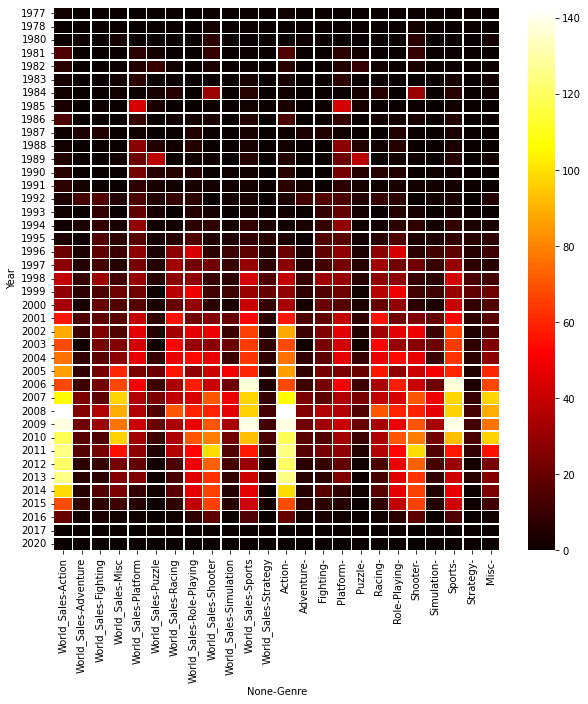

In [203]:
import seaborn as sns

f = plt.figure(figsize=(10,10))
sns.heatmap(df_year2, cmap='hot', linewidths=0.5);
plt.savefig('heatmap.png')

In [204]:
df['Genre'].value_counts()

Action          3257
Sports          2311
Misc            1694
Role-Playing    1471
Shooter         1285
Adventure       1274
Racing          1225
Platform         875
Simulation       846
Fighting         838
Strategy         670
Puzzle           567
Name: Genre, dtype: int64

In [205]:
freq=pd.DataFrame(df.groupby(['Year', 'Genre']).size())
freq.head(10)

0
Year Genre        
1977 Action      1
     Shooter     1
1978 Shooter     1
1980 Action      1
     Adventure   1
     Fighting    1
     Misc        4
     Shooter     2
1981 Action     25
     Platform    3

In [206]:
freq=freq.reset_index()
freq.columns=['Year', 'Genre', 'Counts']
freq.head(10)

,Year,Genre,Counts
0,1977,Action,1
1,1977,Shooter,1
2,1978,Shooter,1
3,1980,Action,1
4,1980,Adventure,1
5,1980,Fighting,1
6,1980,Misc,4
7,1980,Shooter,2
8,1981,Action,25
9,1981,Platform,3


In [207]:
freq_tab=freq.pivot_table(index='Year', columns='Genre',fill_value=0)
freq_tab

Counts                          ...                                   
Genre Action Adventure Fighting Misc  ... Shooter Simulation Sports Strategy
Year                                  ...                                   
1977       1         0        0    0  ...       1          0      0        0
1978       0         0        0    0  ...       1          0      0        0
1980       1         1        1    4  ...       2          0      0        0
1981      25         0        0    0  ...      10          1      4        0
1982      18         0        0    1  ...       5          0      2        0
1983       7         1        0    1  ...       1          0      1        0
1984       1         0        0    1  ...       3          0      2        0
1985       2         0        1    0  ...       1          1      1        0
1986       6         0        0    0  ...       4          0      3        0
1987       2         1        2    0  ...       2          0      4        0
1988       2         0        0    0  ...       1          1      2        0
1989       2         0        0    1  ...       1          0      3        0
1990       3         0        0    0  ...       0          1      3        0
1991       5         2        1    1  ...       3          2      7        4
1992       1         4        7    2  ...       3          1      4        3
1993       6         1       11    3  ...       2          1      9        2
1994       4         4       22    6  ...      11          7     22        6
1995       8        13       29   23  ...      29         14     29       14
1996      20        17       30   23  ...      23         13     52       12
1997      31        14       28   12  ...      27         19     46       21
1998      44        23       41   21  ...      23          8     71       35
1999      40        19       24   25  ...      16         20     62       26
2000      43        16       29   20  ...      20         15     81       16
2001      66        22       18   26  ...      36         28     97       20
2002     127        41       54   45  ...      79         19    189       22
2003     144        12       44   55  ...      73         35    127       37
2004     125        38       40   69  ...      88         27    105       32
2005     193        42       44  111  ...      96         38    123       29
2006     185        71       55  109  ...      70         58    139       42
2007     210        84       50  154  ...      84         90    167       66
2008     223       167       57  212  ...      83        118    202       51
2009     271       142       53  207  ...      91        123    184       65
2010     227       153       40  201  ...      82         79    186       53
2011     245       107       50  183  ...      94         55    122       45
2012     263        58       29   38  ...      48         18     54       15
2013     148        60       20   42  ...      59         18     53       19
2014     186        75       23   41  ...      47         11     55        8
2015     253        53       21   39  ...      34         15     62       17
2016     118        33       14   18  ...      32          9     38       10
2017       1         0        0    0  ...       0          0      0        0
2020       0         0        0    0  ...       0          1      0        0

[41 rows x 12 columns]

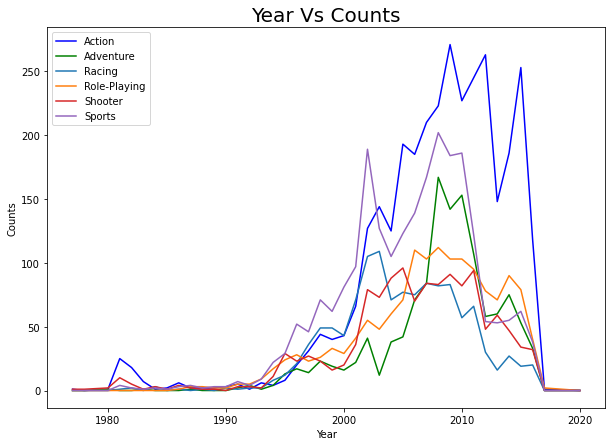

In [208]:
f = plt.figure(figsize=(10,7));
plt.plot(freq_tab.index, freq_tab.Counts.Action, color='b');
plt.plot(freq_tab.index, freq_tab.Counts.Adventure, color='g');
# plt.plot(freq_tab.index, freq_tab.Counts.Fighting, color='r');
# plt.plot(freq_tab.index, freq_tab.Counts.Misc, color='c');
# plt.plot(freq_tab.index, freq_tab.Counts.Platform, color='m');
# plt.plot(freq_tab.index, freq_tab.Counts.Puzzle, color='y');
plt.plot(freq_tab.index, freq_tab.Counts.Racing, color='tab:blue');
plt.plot(freq_tab.index, freq_tab['Counts','Role-Playing'], color='tab:orange');
plt.plot(freq_tab.index, freq_tab.Counts.Shooter, color='tab:red');
# plt.plot(freq_tab.index, freq_tab.Counts.Simulation, color='tab:green');
plt.plot(freq_tab.index, freq_tab.Counts.Sports, color='tab:purple');
# plt.plot(freq_tab.index, freq_tab.Counts.Strategy, color='tab:brown');

plt.xlabel('Year');
plt.ylabel('Counts');
plt.title('Year Vs Counts', fontsize=20);

legend=['Action','Adventure','Racing','Role-Playing','Shooter','Sports']

plt.legend(legend);
plt.savefig('trend.png')
# plt.show()


In [209]:
df['Total_Sales']= df['NA_Sales']+df['EU_Sales']+df['Other_Sales']+df['JP_Sales']

In [210]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,0.25


In [211]:
df_rank=df.sort_values(by='Total_Sales', ascending=False)
df_rank

df_rank_reset=df_rank.reset_index(drop=True)
df_rank_reset=df_rank_reset.rename(columns = {'index':'old_index'})

df_rank_reset.index = df_rank_reset.index + 1

df_rank_reset.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,World_Sales,Total_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,35.83
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,31.38


In [212]:
df_3= pd.DataFrame(df_rank_reset, columns=['Name','Platform','Genre','Publisher','Total_Sales']) 
df_3

,Name,Platform,Genre,Publisher,Total_Sales
1,Wii Sports,Wii,Sports,Nintendo,82.74
2,Super Mario Bros.,NES,Platform,Nintendo,40.24
3,Mario Kart Wii,Wii,Racing,Nintendo,35.83
4,Wii Sports Resort,Wii,Sports,Nintendo,33.00
5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,31.38
...,...,...,...,...,...
16309,Tetris Ultimate,PSV,Puzzle,Ubisoft,0.01
16310,Samurai Shodown Anthology (JP sales),PS2,Fighting,Ignition Entertainment,0.01
16311,Elven Legacy Collection,PC,Strategy,Paradox Interactive,0.01
16312,Plushees,DS,Simulation,Destineer,0.01


In [213]:
from IPython.display import display

tab=df_3.head(30) 
display(tab)

,Name,Platform,Genre,Publisher,Total_Sales
1,Wii Sports,Wii,Sports,Nintendo,82.74
2,Super Mario Bros.,NES,Platform,Nintendo,40.24
3,Mario Kart Wii,Wii,Racing,Nintendo,35.83
4,Wii Sports Resort,Wii,Sports,Nintendo,33.00
5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,31.38
6,Tetris,GB,Puzzle,Nintendo,30.26
7,New Super Mario Bros.,DS,Platform,Nintendo,30.01
8,Wii Play,Wii,Misc,Nintendo,29.01
9,New Super Mario Bros. Wii,Wii,Platform,Nintendo,28.61
10,Duck Hunt,NES,Shooter,Nintendo,28.31
